# Using data analysis to interpret speed of light measurements

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PhysData/course/blob/main/docs/notebooks/light.ipynb)

If you're running this in Colab, make sure to save a copy of the notebook in Google Drive to save your changes.

#### Introduction

In this notebook, we will investigate some of the ways in which the speed of light has been measured throughout history. The speed of light is an incredibly important value as it is the basis of many fields of physics, for example Maxwell’s electromagnetism, and Einstein’s relativity. In this notebook, we will be considering the speed of light in a vacuum, which is almost exactly the same as the speed of light in air (in air, light is 1.0003 times slower). The two main methods we will consider are Foucault’s method using a simple time of flight technique, and the method in which the frequency and the wavelength of light is measured, and then used to calculate the speed of light using the equation:

$c=f\lambda$.

In [ ]:
# If you're running this notebook, uncomment the code in this cell to install the required packages.
# ! pip install numpy
# ! pip install pandas
# ! pip install matplotlib

In [9]:
import numpy
import pandas
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["svg"]

#### Method 1: Fizeau-Foucault

Perhaps the most obvious way to measure the speed of light is to simply measure the time taken for light to travel a certain distance, and then use speed = distance divided by time. This is the basis behind the Fizeau-Foucault method, which was developed and perfected by Hippolyte Fizeau and Leon Foucault in the late 19th century and the early 20th century. Fizeau's method involved passing the beam through a cogwheel and back off a mirror. If the rate of rotation is high enough, the beam will pass through one gap in the cogwheel on the way there and another on the way back. Once this rotation speed is known, as well as the distance between the wheel and mirror, and the number of teeth on the wheel, these can be used to calculate the speed of light. 

<div>
<img src="../media/pins7.png" width="500"/>
</div>

Later, Foucault used a rotating mirror instead of a rotating cogwheel, so that by the time the light had hit the fixed mirror and returned back to the rotating one, it had rotated a small angle, which could then be measured by detecting the change in the lights path from where it was initially emitted. Then, knowing the rotation rate of the mirror and the distance the light has travelled, the speed of light can be determined.

![](../media/pinsgif.gif)

In 1879, A. Michelson was working as a physics instructor in Annapolis, when he was ordered to investigate the speed of light based off of Foucault’s  most recent measurement. He repeated Foucault’s rotating mirror method, but increased the path length from about 66 feet to 200 feet (roughly 20 metres to 61 metres). He also managed to get his mirror spinning at 256 rotations per second, quite an incredible feat for his time, using a combination of compressed air, tuning forks, and more mirrors. There were of course, plenty of environmental factors to consider, temperature fluctuations, the refractive index of the atmosphere, etc. However Michelson accounted all of them.

The raw data can be found here: https://www.randomservices.org/random/data/Michelson.html

Below you can see the results that Michelson recorded in the form of a bar graph, lets perform some analysis on this data.

In [10]:
mich = pandas.read_csv("https://risk-engineering.org/static/data/michelson-speed-light.csv")
mich.rename(columns={"velocity of light in air (km/s)": "speed"}, inplace=True)

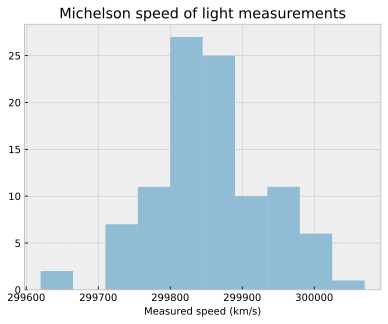

In [11]:
plt.xlabel("Measured speed (km/s)")
plt.title("Michelson speed of light measurements")
plt.hist(mich.speed, alpha=0.5);

The mean value from Michelson’s measurements is

In [12]:
mich.speed.mean()

299852.4

Since there is clearly some measurement uncertainty, we would like to report a **95% confidence interval** for the measurements. We can do this using bootstrap resampling, as implemented in the function below. 

Bootstrap resampling is where we make our sample size bigger by randomly copying samples from the original data set into a new data set, until we reach the size we want. The process is quite simple, and follows these steps:

    Choose the size of the sample.
    While the size of the sample is less than the chosen size:
        Randomly select an observation from the dataset
        Add it to the sample

 Then we can estimate the mean and confidence interval of the original data set as the mean and confidence interval of the new data set. This procedure is quite useful in statistics, for example it can be used to estimate the skill of a machine learning model.

In [13]:
def bootstrap_confidence_intervals(data, estimator, percentiles, runs=1000):
    replicates = numpy.empty(runs)
    for i in range(runs):
        replicates[i] = estimator(numpy.random.choice(data, len(data), replace=True))
    est = numpy.mean(replicates)
    ci = numpy.percentile(replicates, percentiles)
    return (est, ci)

In [14]:
est, ci = bootstrap_confidence_intervals(mich.speed, estimator=numpy.mean, percentiles=[2.5, 97.5])
est
ci
est - ci[0], ci[1] - est

(15.853699999977835, 15.456300000078045)

The first value you see is the bootstrapped estimate of the mean, which we can see is almost exactly the same as the original mean, the second and third is the 95% confidence interval displayed in two different ways. Given that the confidence interval is roughly symmetrical, we could report this measurement as

    299853 ± 16 km/s (95% CI) 

or as 

    2998523 [299837, 299869] km/s (95% CI). 

Note that a ± notation without the "(95% CI)" for the margin of error is ambiguous, as is soley an interval, because some scientific communities use one or two standard deviations instead of a confidence interval. 

After accounting for his uncertainties, Michelson’s final measurement for the speed of light in a vacuum was reported as 299944 ± 51 km/s. Despite this, he vehemently stated his measurement was actually correct to approximately ± 150 km/s, in fact the difference between his result and todays accepted value is 148 km/s. Getting this close to todays accepted value with as small as an uncertainty as he did was very impressive given the technology of the time.

#### Method 2: Interferometry

The second method is a much more modern one, although Michelson himself pioneered one of the key inventions used, the interferometer. Here, we will consider is a type of interferometry using modulated light. Here, the intensity of the light is varied with time in a sinusoidal manner, thus if we choose the frequency of the light sensibly, we can obtain a measurable wavelength. If two identical sources are the same distance from a detector, they will arrive in phase. If they are a distance Δx apart, then the peaks in one intensity measurement will not necessarily coincide with the peaks in the second.  There is a phase difference between the peaks of the intensity waveforms. The only time they will be in phase is if the distance difference is an integer number of the modulation wavelength of the light. Thus if we can use the detector to measure the phase difference, we have the wavelength as 

$\theta=2\pi\frac{\Delta{x}}{\lambda_{mod}}$.

![](../media/pins1.png)

This means, knowing the modulation frequency, we can work out the speed of light using

$c=f_{mod}\lambda_{mod}$.

Put together, the apparatus looks something like this:

<div>
<img src="../media/pins2.png" width="500"/>
</div>

When the laser is turned on, the oscilloscope will display the original waveform as well as the waveform recieved at the APD module. From this, the time delay (in nanoseconds) can be measured from the phase difference between these two waves (x-axis). The data has been recorded for various optical path lengths (in cm), changed by moving the mirror along the optical rail.

In [15]:
time_delay = numpy.array([3.3, 3.9, 4.7, 5.1, 6.0, 6.5, 7.2, 7.8, 8.6, 9.1, 10.0, 11.6])
path_length = numpy.array([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240])
a,b = numpy.polyfit(path_length,time_delay,1)

Looking at errors, the uncertainty in path length was half a cm, however since the laser travels the length twice, it must be doubled to 1 cm. For the time delay, half of the smallest division on the time axis was 0.25 ns, so an overall uncertainty of 0.5 ns as the measurement involves measuring the difference between one waveform and the other. Plotting path length against time delay we get the following plot.

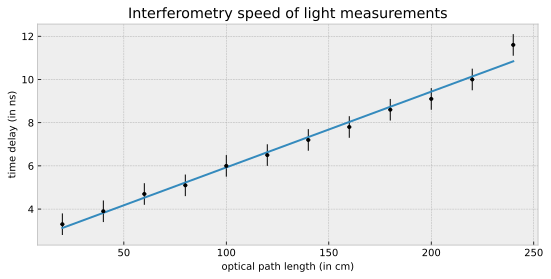

In [16]:
plt.figure(figsize=(9, 4))
plt.errorbar(path_length, time_delay, yerr=0.5, xerr=1, fmt='.k', elinewidth=1)
plt.xlabel('optical path length (in cm)')
plt.ylabel('time delay (in ns)')
plt.title("Interferometry speed of light measurements")
plt.plot(path_length, a*path_length+b)
plt.show()

From this graph, we can measure the gradient to get the speed of light, along with it's uncertainty.
We obtain 0.03507 ns $cm^{-1}$ for the gradient, and 0.00126 ns $cm^{-1}$ for the uncertainty. If we convert these to SI units we have 3.507 s $m^{-1}$ and 0.126 s $m^{-1}$. Since the speed of light is one over the gradient, our final result for the speed of light becomes

(2.851 ± 0.102) x $10^{8}$ m $s^{-1}$

or for comparison

285100 ± 10200  km $s^{-1}$

The error was calculated using the standard formula 

|$α_{c}$| = c|$α_{m}$/m|

where m represents the gradient and $α_{m}$ represents the error in the gradient.

Clearly, this method is by no means perfect, as evidenced by the result. Not only is todays accepted value outside of this range, but the uncertainty itself is very large compared to the Michelson experiment. The main cause of this is the lack of measurements, only 12 readings has dramatically increased this error. A much more precise interferometry experiment was performed in 1972 by the National Bureau of Standards, obtaining a fractional uncertainty of 3.5 x $10^{-9}$ (see https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.29.1346).

#### Other methods 

There are of course, other methods used in the past to measure the speed of light, for example the first recorded estimate was made by Ole Christensen Romer in 1676, who used the change in orbital period of Jupiter’s moon Io due to the changing distance between Jupiter and the Earth. When the Earth is approaching Jupiter, the period is shorter, and when receeding, longer. Thus the speed of light can be estimated as the change in period also depends on the time taken for light to reach the Earth.

![](../media/pins3.png)

In the modern era, the limiting factor in measuring the speed of light became not the uncertainty of experiments, for example in 1972 using laser interferometry, the speed of light was measured as 299792456.2±1.1 m/s. This small remaining uncertainty was caused by the definition of the metre. In order to get around this, the meeting of the General Conference on Weights and Measures (CGPM) redefined the metre as "the length of the path traveled by light in vacuum during a time interval of 1/299792458 of a second." This permanently fixed the speed of light to be exactly 299792458 m/s, so now, further experiments don’t change the definition of the speed of light, but rather the definition of the metre.

#### References:

* I. G. Hughes and T. P. A. Hase, Measurements and their Uncertainties, Oxford University Press, Oxford (2010), pp. 39
* Analyzing speed of light measurements [online]
https://risk-engineering.org/notebook/data-analysis-speed-light.html
* Speed of light [online]
https://en.wikipedia.org/wiki/Speed_of_light#Measurement
* Master Michelson's measurement [online]
https://physicstoday.scitation.org/doi/10.1063/1.2774115
* Speed of Light from Direct Frequency and Wavelength Measurements
of the Methane-Stabilized Laser [online]
https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.29.1346
* A Gentle Introduction to the Bootstrap Method [online]
https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/
* Michelson's Velocity of Light Data [online]
https://www.randomservices.org/random/data/Michelson.html
* R. J. MacKay and R. W. Oldford, *Scientific Method, Statistical Method and the Speed of Light*, Statistical Science, 2000, 15:3, pp. 254–278
* S. Prokhovnik and W. Morris, *A review of speed of light measurements since 1676*, CEN Tech. J. 1993, 7:2, pp. 181–183

If you wish to get an overview of the remaining topics in this course, click the button below.

[![Back to main website](../media/back4.png)](https://physdata.vercel.app/)